In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('/content/bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [3]:
x = df.drop('pIC50', axis=1)
x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
114,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
115,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
116,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = df.pIC50
y

,pIC50
0,4.869666
1,4.882397
2,6.008774
3,6.022276
4,4.950782
...,...
113,4.974694
114,4.995679
115,4.939302
116,4.970616


In [5]:
x.shape

(118, 881)

In [6]:
y.shape

(118,)

In [9]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(x)

In [11]:
X.shape

(118, 197)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y , test_size=0.2)

In [14]:
X_train.shape, Y_train.shape

((94, 197), (94,))

In [15]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.47210386584284625

In [16]:
Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

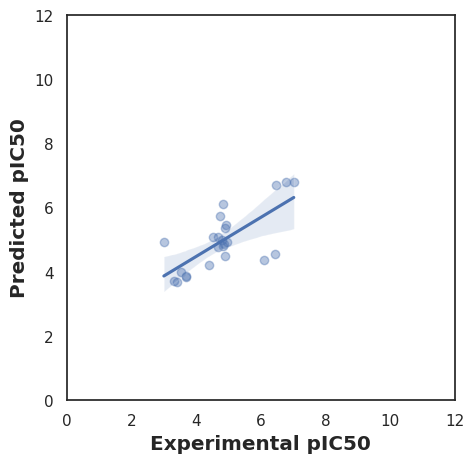

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test,y= Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show